# GCCN prediction for perovskites

In [1]:
from tf_chpvk_pv.modeling.GCCN_Predict import run_prediction

run_prediction()

2026-02-17 07:48:49.914 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


loading data...completed 0.035219430923461914 sec
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_000.pth.tar


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/GCCN_Predict.py:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(p))


Pred : [0][0/1]	Time 1.862 (1.862)
Pred  end: [0]	Time 1.862
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_001.pth.tar
Pred : [1][0/1]	Time 0.034 (0.034)
Pred  end: [1]	Time 0.034
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_002.pth.tar
Pred : [2][0/1]	Time 0.012 (0.012)
Pred  end: [2]	Time 0.012
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_003.pth.tar
Pred : [3][0/1]	Time 0.019 (0.019)
Pred  end: [3]	Time 0.019
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_004.pth.tar
Pred : [4][0/1]	Time 0.013 (0.013)
Pred  end: [4]	Time 0.013
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_005.pth.tar
Pred : [5][0/1]	Time 0.013 (0.013)
Pred  end: [5]	Time 0.013
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_006.pth.tar
Pred : [6][0/1]	Time 0.011 (0.011)
Pred  end: [6]	Time 0.011
Loading model /home/dagar/TF-ChPVK-PV/data/interim/weights/W_Perov_All_007.

Now let's check the results

In [12]:
import pandas as pd
from pymatgen.core.composition import Composition
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import normalize_abx3


pred = pd.read_csv(PROCESSED_DATA_DIR / "prediction.csv")

df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_HHI.csv")
df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")

df_sisso.rename(columns={"formula": "material"}, inplace=True)

df_sisso["norm_formula"] = df_sisso["material"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["material"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])].copy()
df_crystal_sisso['pymatgen_formula'] = df_crystal_sisso['material'].apply(lambda x: Composition(x).formula)

pred['Composition'] = pred['id'].apply(lambda x: x.replace("_1", "")).apply(Composition)
pred['pymatgen_formula'] = pred['Composition'].apply(lambda x: x.formula)

predsort_values = pred.sort_values(by='CL score', ascending=False)
predsort_values.head(10)

,id,CL score,CL score std,Composition,pymatgen_formula
6,BaZrS3_1,0.990686,0.023706,"(Ba, Zr, S)",Ba1 Zr1 S3
4,BaUS3_1,0.989047,0.016088,"(Ba, U, S)",Ba1 U1 S3
18,EuScS3_1,0.987745,0.019361,"(Eu, Sc, S)",Eu1 Sc1 S3
2,BaHfS3_1,0.987208,0.025012,"(Ba, Hf, S)",Ba1 Hf1 S3
14,DyScS3_1,0.984986,0.016760,"(Dy, Sc, S)",Dy1 Sc1 S3
10,CeScS3_1,0.982454,0.030949,"(Ce, Sc, S)",Ce1 Sc1 S3
23,EuZrS3_1,0.981398,0.030479,"(Eu, Zr, S)",Eu1 Zr1 S3
24,GdScS3_1,0.980566,0.042843,"(Gd, Sc, S)",Gd1 Sc1 S3
41,SrSnS3_1,0.980511,0.035993,"(Sr, Sn, S)",Sr1 Sn1 S3
28,LaScS3_1,0.975184,0.081812,"(La, Sc, S)",La1 Sc1 S3


In [14]:
df_crystal_sisso.columns

Index(['material', 'A', 'B', 'X', 'nA', 'nB', 'nX', 'chi_A', 'chi_B', 'chi_X',
       'chi_diff', 'rX', 'rA', 'rB', 'delta_chi_AX', 'delta_chi_BX',
       'delta_chi_AO', 'delta_chi_BO', 'rA_rB_ratio', 'rB_rX_ratio',
       'rA_rX_ratio', 'chi_AX_ratio', 'chi_BX_ratio', 'HOMO_A', 'HOMO_B',
       'HOMO_X', 'LUMO_A', 'LUMO_B', 'LUMO_X', 'EA_A', 'EA_B', 'EA_X', 'IP_A',
       'IP_B', 'IP_X', 'rS_A', 'rS_B', 'rS_X', 'rP_A', 'rP_B', 'rP_X', 'rD_A',
       'rD_B', 'rD_X', 't_sisso', 't', 'tau', 't_jess', 'bandgap',
       'bandgap_sigma', 'norm_formula', 'pymatgen_formula'],
      dtype='object')

In [15]:
final_pred = predsort_values.merge(df_crystal_sisso, on='pymatgen_formula', how='left')
final_pred.head(10)

,id,CL score,CL score std,Composition,pymatgen_formula,material,A,B,X,nA,...,rD_A,rD_B,rD_X,t_sisso,t,tau,t_jess,bandgap,bandgap_sigma,norm_formula
0,BaZrS3_1,0.990686,0.023706,"(Ba, Zr, S)",Ba1 Zr1 S3,BaZrS3,Ba,Zr,S,2.0,...,131.01,84.44,273.21,0.819697,0.938430,3.892763,1.049835,1.789960,0.157152,BaZrS3
1,BaUS3_1,0.989047,0.016088,"(Ba, U, S)",Ba1 U1 S3,BaUS3,Ba,U,S,2.0,...,131.01,131.23,273.21,0.667229,0.892006,4.120009,1.014847,2.531824,0.260006,BaUS3
2,EuScS3_1,0.987745,0.019361,"(Eu, Sc, S)",Eu1 Sc1 S3,EuScS3,Eu,Sc,S,3.0,...,114.02,58.09,273.21,0.817190,0.908021,2.035359,0.953741,1.728760,0.254795,EuScS3
3,BaHfS3_1,0.987208,0.025012,"(Ba, Hf, S)",Ba1 Hf1 S3,BaHfS3,Ba,Hf,S,2.0,...,131.01,89.51,273.21,0.819697,0.938430,3.892763,1.039806,2.026456,0.207781,BaHfS3
4,DyScS3_1,0.984986,0.016760,"(Dy, Sc, S)",Dy1 Sc1 S3,DyScS3,Dy,Sc,S,3.0,...,111.98,58.09,273.21,0.809484,0.858445,2.903018,0.896607,2.046099,0.216236,DyScS3
5,CeScS3_1,0.982454,0.030949,"(Ce, Sc, S)",Ce1 Sc1 S3,CeScS3,Ce,Sc,S,3.0,...,118.68,58.09,273.21,0.821182,0.898106,2.163268,0.963598,1.794310,0.190333,CeScS3
6,EuZrS3_1,0.981398,0.030479,"(Eu, Zr, S)",Eu1 Zr1 S3,EuZrS3,Eu,Zr,S,2.0,...,114.02,84.44,273.21,0.840446,0.914772,4.036183,0.951298,1.798262,0.214813,EuZrS3
7,GdScS3_1,0.980566,0.042843,"(Gd, Sc, S)",Gd1 Sc1 S3,GdScS3,Gd,Sc,S,3.0,...,111.28,58.09,273.21,0.820321,0.876710,2.508560,0.920854,1.930928,0.188730,GdScS3
8,SrSnS3_1,0.980511,0.035993,"(Sr, Sn, S)",Sr1 Sn1 S3,SrSnS3,Sr,Sn,S,2.0,...,111.21,46.94,273.21,0.821503,0.921860,3.974182,1.440533,2.090290,0.525292,SnSrS3
9,LaScS3_1,0.975184,0.081812,"(La, Sc, S)",La1 Sc1 S3,LaScS3,La,Sc,S,3.0,...,119.73,58.09,273.21,0.818168,0.871492,2.610363,0.939751,1.921158,0.272241,LaScS3


Here we plot the new derived CL score (Crystal-likeness score) vs the radii of the cations to evaluate any kind of correlation

                rA  CL score
rA        1.000000  0.303425
CL score  0.303425  1.000000


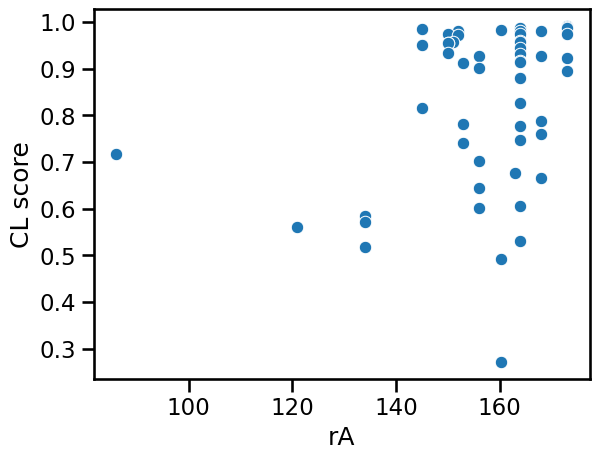

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

sns.scatterplot(data=final_pred, y='CL score', x='rA')

print(final_pred[['rA', 'CL score']].corr())

                rB  CL score
rB        1.000000 -0.147898
CL score -0.147898  1.000000


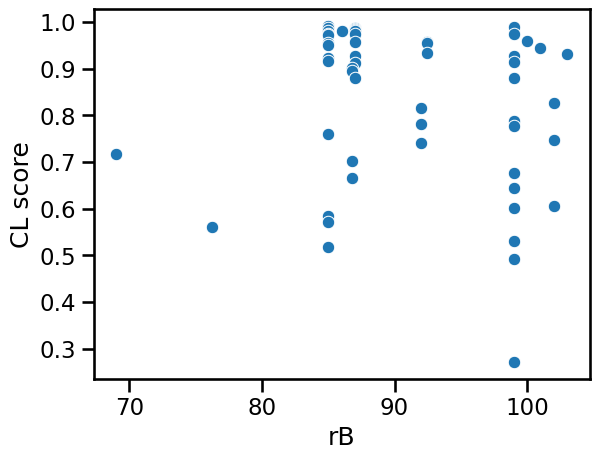

In [21]:
sns.scatterplot(data=final_pred, y='CL score', x='rB')

print(final_pred[['rB', 'CL score']].corr())

Save the final data with the proper composition for the stable perovskite-type structures

In [23]:
final_pred[['Composition', 'CL score', 'CL score std']].to_csv(PROCESSED_DATA_DIR / "final_CL_scores.csv", index=False)

# Trial with thermodynamics data from MaterialsProject

Definition of the main function to look up for the system (A-B-X) based on the composition ABX$_3$ withouth considering oxygen

In [1]:
from tf_chpvk_pv.synthesis_planning.synthesis_pathways import SynthesisPathways
from tf_chpvk_pv.synthesis_planning.interfacial_pdplotter import InterReactions, Inter_PDPlotter

from pymatgen.analysis.reaction_calculator import ComputedReaction
from pymatgen.analysis.phase_diagram import CompoundPhaseDiagram

def get_reaction_from_string(target, to_show = True):

    # get the optimal synthesis recipe for a target material
    sp = SynthesisPathways(target,
                        exclude_reactants = ["O2"],
                        selected_reactions_to_csv = True)

    # display the selected reactions
    for reaction in sp.selected_reactions:
        reaction.display()

    # Visualize interfacial reaction compound phase diagram for the optimal reaction
    if len(sp.selected_reactions) > 0:
        reaction = sp.selected_reactions[0]
        interfacial_reactions = InterReactions(reaction)
        Inter_PDPlotter(
            interfacial_reactions,
            emphasize_entries = [reaction.target]
        ).show(to_show=to_show)

2026-02-16 12:32:29.386 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/synthesis_planning/materials_entries.py:15: UserWarning: MP_API_KEY environment variable not set. Materials Project API calls will fail. Set it in a .env file or export MP_API_KEY=your_key
  from tf_chpvk_pv.synthesis_planning import settings


CrystaLLM predicted stable perovkiste-type compositions

In [2]:
#CrystaLLM predictions processing

import pandas as pd
from tf_chpvk_pv.config import CRYSTALLM_DATA_DIR, PROCESSED_DATA_DIR


df_compositions = pd.read_csv(CRYSTALLM_DATA_DIR / 'results CrystaLLM.csv')
df_compositions.rename(columns={'material': 'formula'}, inplace=True)
df_compositions.set_index('formula', inplace=True)


for formula in df_compositions.index:
    try:
        get_reaction_from_string(formula, False)
    except Exception as e:
        print(f"Error processing {formula}: {e}")
        continue

loading from cache. stable entries S-Tb-Zn
all possible pairwise reactions: 2

target: TbZnS3
reactants: ['ZnS', 'TbS2']
reaction energy: -0.00020000000000663923
inverse hull energy: -0.0002000000000066393
reaction: ZnS + TbS2 -> TbZnS3
competing phases: []


loading from cache. stable entries Se-Sr-U
all possible pairwise reactions: 2

target: SrUSe3
reactants: ['USe2', 'SrSe']
reaction energy: -0.00020000000009048335
inverse hull energy: -0.00020000000009012808
reaction: USe2 + SrSe -> SrUSe3
competing phases: []


loading from cache. stable entries Ce-Se-U
all possible pairwise reactions: 5
No valid reactions found for CeUSe3. with the current reactions: [0.5 Ce2Se3 + 0.5 U2Se3 -> CeUSe3, CeSe + USe2 -> CeUSe3, Ce + USe3 -> CeUSe3, USe + CeSe2 -> CeUSe3, 0.5 USe + 0.5 Ce2USe5 -> CeUSe3]
loading from cache. stable entries Al-Se-Sn
all possible pairwise reactions: 0
No valid reactions found for AlSnSe3. with the current reactions: []
loading from cache. stable entries Eu-S-Tb
all poss

Store the data for all reactions

In [3]:
import os
from tf_chpvk_pv.config import SYNTHESIS_DATA_DIR, PROCESSED_DATA_DIR

folder = str(SYNTHESIS_DATA_DIR / "results_files")

df_all = pd.DataFrame()

for composition in df_compositions.index:
    if not os.path.exists(f"{folder}/{composition}_result.csv"):
        print(f"File for {composition} does not exist, skipping.")
        continue
    df_rx = pd.read_csv(f"{folder}/{composition}_result.csv")
    if df_rx.empty:
        print(f"No reactions found for {composition}, skipping.")
        continue
    df_all = pd.concat([df_all, df_rx], ignore_index=True)

df_all.to_csv(PROCESSED_DATA_DIR / "results_synthesis_prediction.csv", index=False)

File for UCeSe3 does not exist, skipping.
No reactions found for AlSnSe3, skipping.
No reactions found for TbEuS3, skipping.
File for YbEuSe3 does not exist, skipping.
File for LuSmS3 does not exist, skipping.
File for UPrSe3 does not exist, skipping.
File for TbLaS3 does not exist, skipping.
No reactions found for BaPrS3, skipping.
No reactions found for EuScS3, skipping.
No reactions found for SmZrS3, skipping.
No reactions found for UBiS3, skipping.
File for UScS3 does not exist, skipping.
File for TbLaSe3 does not exist, skipping.
File for UEuSe3 does not exist, skipping.
File for TmEuS3 does not exist, skipping.
File for YbEuS3 does not exist, skipping.
No reactions found for DyZrS3, skipping.
File for DyEuS3 does not exist, skipping.
No reactions found for LaZrS3, skipping.
File for UCeS3 does not exist, skipping.
File for UEuS3 does not exist, skipping.
No reactions found for ZrCuSe3, skipping.
File for USmSe3 does not exist, skipping.
File for YbSmS3 does not exist, skipping.
N

Understand for which percentage of compounds we found thermodynamic data

In [33]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR

# Count compounds with data
compounds_with_data_no = df_all['target'].nunique() 
compounds_with_data = df_all['target'].unique()
total_compositions = len(df_compositions)

df_exp = pd.read_csv(PROCESSED_DATA_DIR / "chpvk_dataset.csv")
df_exp_label_1 = df_exp[df_exp['exp_label'] == 1]
df_exp_label_1SSe = df_exp_label_1[df_exp_label_1['X'].isin(['Se', 'S'])]

materials_reported_exp = [x for x in compounds_with_data if x in df_exp_label_1SSe['material'].values]

print(f"Compounds with synthesis data: {compounds_with_data_no}")
print(f"Compounds with synthesis data and reported experimentally: {len(materials_reported_exp)}")
print(f"Total compositions: {total_compositions}")
print(f"Total Coverage: {compounds_with_data_no/total_compositions*100:.1f}%")
print(f"Coverage of new compositions: {(compounds_with_data_no - len(materials_reported_exp))/total_compositions*100:.1f}%")

Compounds with synthesis data: 28
Compounds with synthesis data and reported experimentally: 13
Total compositions: 54
Total Coverage: 51.9%
Coverage of new compositions: 27.8%
